In [1]:
import numpy as np
import matplotlib.pyplot as plt

In [2]:
def rgb_to_grayscale(image):
    R = image[:, :, 0].astype(np.float64)
    G = image[:, :, 1].astype(np.float64)
    B = image[:, :, 2].astype(np.float64)

    # Konversi RGB ke grayscale menggunakan bobot persepsi
    gray = 0.299 * R + 0.587 * G + 0.114 * B

    return gray


In [3]:
# Fungsi untuk membuat kernel Gaussian
def gaussian_kernel(size, sigma):
    kernel = np.zeros((size, size))
    center = size // 2
    for x in range(size):
        for y in range(size):
            x_diff = x - center
            y_diff = y - center
            kernel[x, y] = np.exp(-(x_diff**2 + y_diff**2) / (2 * sigma**2))
    kernel /= np.sum(kernel)  # Normalisasi
    return kernel

In [4]:
# Fungsi untuk konvolusi manual
def convolve(image, kernel):
    img_height, img_width = image.shape
    kernel_size = kernel.shape[0]
    pad = kernel_size // 2
    padded_image = np.pad(image, pad, mode='constant', constant_values=0)
    output = np.zeros_like(image, dtype=np.float64)
    
    for i in range(img_height):
        for j in range(img_width):
            output[i, j] = np.sum(
                padded_image[i:i+kernel_size, j:j+kernel_size] * kernel
            )
    return output

In [5]:
# Fungsi untuk membuat kernel Laplacian
def laplacian_kernel():
    return np.array([[0, 1, 0],
                     [1, -4, 1],
                     [0, 1, 0]])

In [10]:
# Membaca gambar
image = plt.imread('1.jpg')

# Mengkonversi ke grayscale jika gambar berwarna
if len(image.shape) == 3:
    image = rgb_to_grayscale(image)
else:
    image = image.astype(np.float64)  # Pastikan tipe data float untuk pemrosesan

In [11]:
# Parameter
sigma = 2.0
kernel_size = 5  # Harus ganjil

In [12]:
# Langkah 1: Membuat kernel Gaussian
gaussian = gaussian_kernel(kernel_size, sigma)

In [13]:
# Langkah 2: Terapkan Gaussian Blur secara manual
blurred = convolve(image, gaussian)


In [14]:
# Langkah 3: Membuat kernel Laplacian
laplacian = laplacian_kernel()

In [15]:
# Langkah 4: Terapkan Laplacian pada gambar yang sudah di-blur
log_result = convolve(blurred, laplacian)

In [16]:
# Mengkonversi hasil ke format 8-bit untuk visualisasi
log_result_8bit = np.uint8(np.clip(np.absolute(log_result), 0, 255))

In [17]:
# Menampilkan hasil
plt.figure(figsize=(15, 5))

<Figure size 1500x500 with 0 Axes>

<Figure size 1500x500 with 0 Axes>

(np.float64(-0.5), np.float64(699.5), np.float64(807.5), np.float64(-0.5))

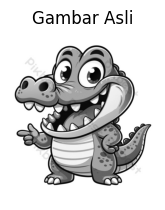

In [18]:
plt.subplot(1, 3, 1)
plt.title('Gambar Asli')
plt.imshow(image, cmap='gray')
plt.axis('off')

(np.float64(-0.5), np.float64(699.5), np.float64(807.5), np.float64(-0.5))

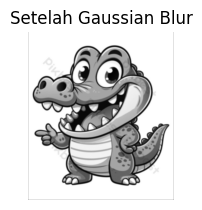

In [19]:
plt.subplot(1, 3, 2)
plt.title('Setelah Gaussian Blur')
plt.imshow(blurred, cmap='gray')
plt.axis('off')

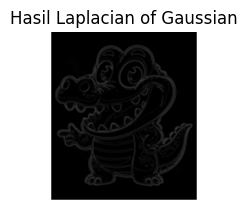

In [20]:
plt.subplot(1, 3, 3)
plt.title('Hasil Laplacian of Gaussian')
plt.imshow(log_result_8bit, cmap='gray')
plt.axis('off')

plt.show()